# S03 T02 Visualització Gràfica Múltiples Variables
***Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables***

## Nivell 1
### Exercici 1

***Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".***

#### Importació i preparacio i analisis i gràfiques inicials  segons GitHub , al 

In [610]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.max_columns=None
pd.options.display.max_rows=30

In [611]:
#Importem les llibreries i veiem diferents propietats
tipsDf=pd.read_csv('Tips.csv',index_col=False,sep=',', encoding='utf8')

In [612]:
tipsDf.shape

(244, 7)

In [613]:
tipsDf.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


***Canviem el nom de la columna size ja que es paraula clau i dona problemes***

In [614]:
tipsDf.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [615]:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [616]:
tipsDf.columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'asistentes']

***Insertem columna calculada amb el percentatge de propina respecte el total de  la factura***

In [617]:
tipsDf['tip_pct']=round((tipsDf['tip']/(tipsDf['total_bill'] - tipsDf['tip']))*100,2)
tipsDf.head(5)

,total_bill,tip,sex,smoker,day,time,asistentes,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


#### Multiples distribucions bivariades
* pairplot


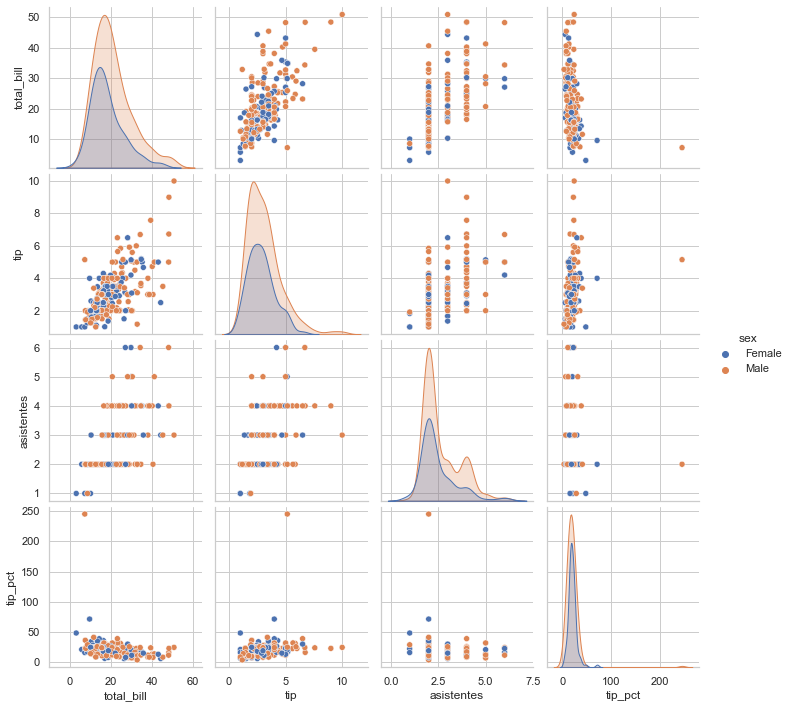

In [618]:
sns.pairplot(data=tipsDf,hue='sex')

#### Bar Plots


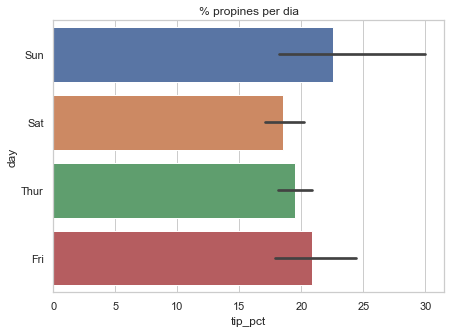

In [619]:
plt.figure(figsize =(7, 5))
plt.title("% propines per dia")
sns.barplot(x='tip_pct', y='day',data=tipsDf, orient="h")
plt.show()

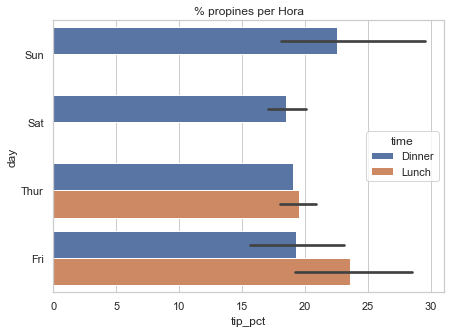

In [620]:
plt.figure(figsize =(7, 5))
plt.title("% propines per Hora")
sns.barplot(x='tip_pct', y='day', hue='time', data=tipsDf, orient='h')
plt.show()


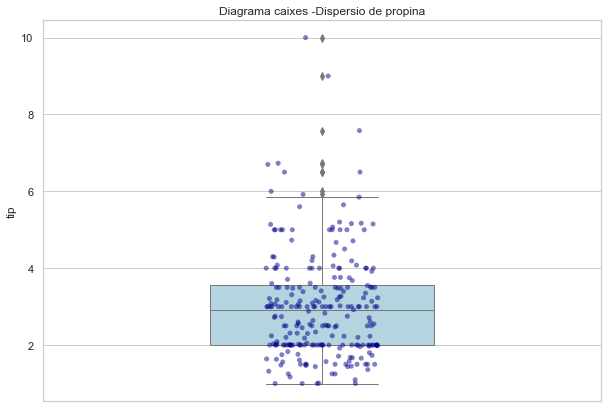

In [652]:
#boxplot + stripplot de les propines 
plt.figure(figsize =(10, 7))
boxwidth = .4
plt.title("Diagrama caixes -Dispersio de propina")
sns.set_style("whitegrid")
ax = sns.boxplot(y="tip", data=tipsDf,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=boxwidth)
ax = sns.stripplot(y=tipsDf["tip"], orient='v', color='darkblue', alpha= 0.5)

#### Una variable numèrica
* Densidat factures per import

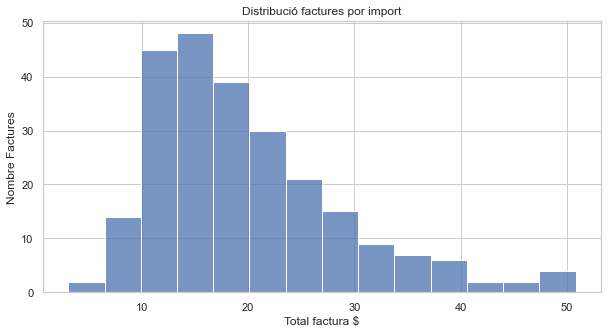

In [656]:
plt.figure(figsize =(10, 5))
plt.title('Distribució factures por import')
myHistPlot=sns.histplot(data=tipsDf, x="total_bill")
myHistPlot.set( xlabel = "Total factura $", ylabel = "Nombre Factures")
plt.show()

#### Una variable catgórica i una numèrica
* Total factura por sexe

[Text(0.5, 0, 'Sexe'), Text(0, 0.5, 'Import factura')]

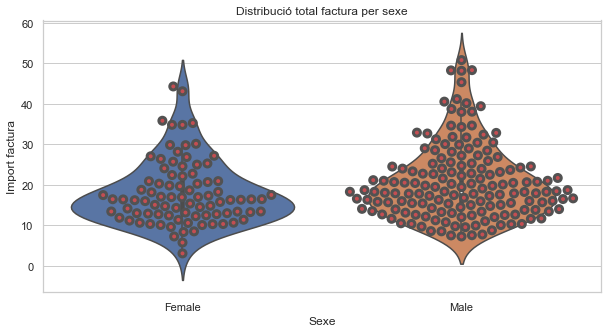

In [659]:
plt.figure(figsize =(10, 5))
plt.title('Distribució total factura per sexe')
sns.set_style("whitegrid")
myViolinPlot=sns.violinplot(data=tipsDf, x="sex",y='total_bill')
sns.swarmplot(data=tipsDf, x="sex", y='total_bill', color="r", linewidth=3, size=7)
myViolinPlot.set( xlabel = "Sexe", ylabel = "Import factura")

#### Dues variable catgórica i una numèrica
    * Dia de la semana i fumador/no fumador

[Text(0.5, 0, 'Dia'), Text(0, 0.5, '% Propina vs totaal factura')]

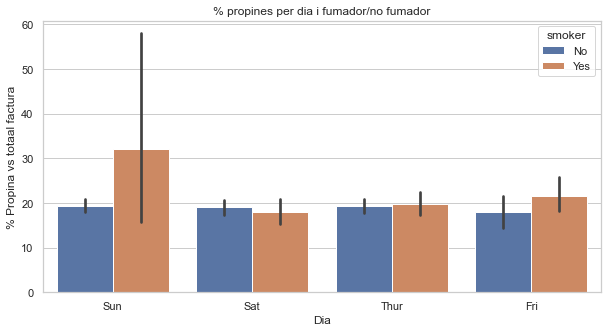

In [660]:
plt.figure(figsize =(10, 5))
plt.title('% propines per dia i fumador/no fumador')
myBarPlot=s2=sns.barplot(x = 'day', y = 'tip_pct', data = tipsDf,hue="smoker")
myBarPlot.set( xlabel = "Dia", ylabel = "% Propina vs totaal factura")

* Propines per sexe i fumador/no fumador

[Text(0.5, 0, 'Sexe'), Text(0, 0.5, 'Total propina $')]

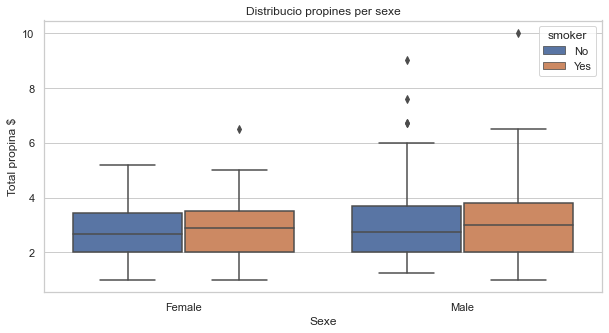

In [661]:
plt.figure(figsize =(10, 5))
myBoxPlot=sns.boxplot(x=tipsDf['sex'], y=tipsDf['tip'], 
            hue=tipsDf['smoker'], )
plt.title('Distribucio propines per sexe')
myBoxPlot.set( xlabel = "Sexe", ylabel = "Total propina $")

* Nombre factures  per sexe i dia de la setmana

[Text(0.5, 0, 'Dia'), Text(0, 0.5, 'Nombre Factures')]

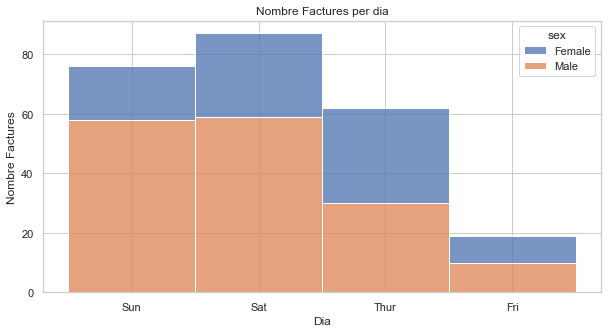

In [662]:
plt.figure(figsize =(10, 5))
plt.title('Nombre Factures per dia')
myHisPlot=sns.histplot(data=tipsDf, x="day", hue="sex", multiple="stack")
myHisPlot.set( xlabel = "Dia", ylabel = "Nombre Factures")

#### Tres variable catgóricques i una numèrica
* Distribució Total factura per Asistents , sexe i fumador/no fumador"

<Figure size 720x360 with 0 Axes>

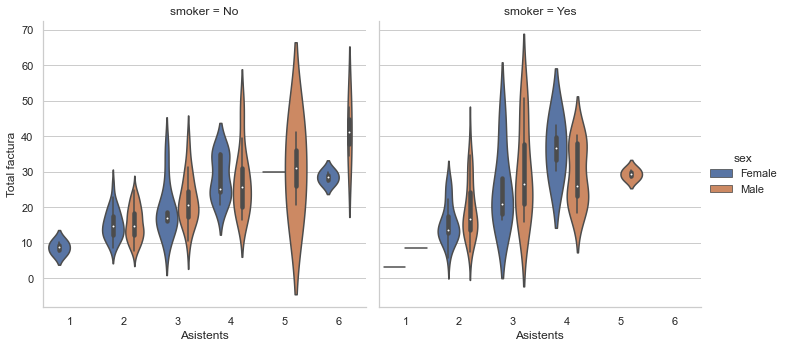

In [627]:
plt.figure(figsize =(10, 5))
myCatPlot=sns.catplot(x='asistentes', y='total_bill',ylabel='Total facura', hue = 'sex', col='smoker', data=tipsDf, orient='v', kind='violin')
myCatPlot.set( xlabel = "Asistents", ylabel = "Total factura")
plt.show()

* Dia de la semana i fumador/no fumador -box

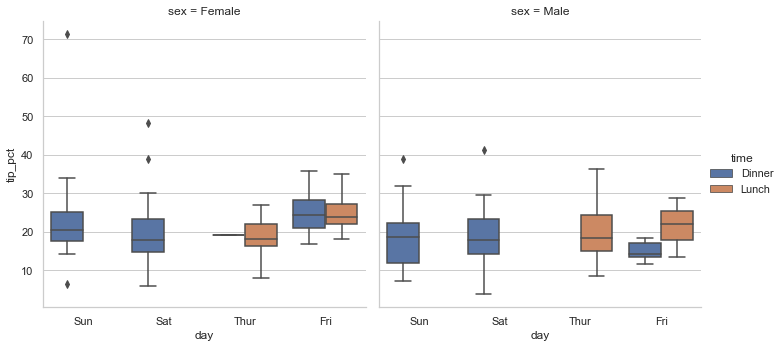

In [628]:
sns.catplot(x='day', y='tip_pct', hue='time', col='sex',
               kind='box', data=tipsDf[tipsDf.tip_pct < 245]);

## Nivell 2
### Exercici 1

***Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat***

***En aquest cas el fitxer de entrada no es un csv***
* Hem d'especificar el separador ::
* Haurem de indexar el nom de les columnes
* Generar un columna amb l'any que la extarurem del titol
* Un película pot tenir molts generes , podem fer servir get_dummies per seaprar el generé per columnes i deixar 1 si te el genere o be 0 sino el té
te capçaleres i la separació es::***
        

***Hem usat ISO-8859-1***


In [629]:

columnes=['Iden','Titol','Genere']
moviesDf = pd.read_table('movies.dat', sep='::', header=None, names=columnes,encoding='ISO-8859-1',engine='python')
moviesDf.head(2)

,Iden,Titol,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


#### Transformacio del daaset per separar l'any del titol i sepaarar els generes

In [630]:

import re
#Establim un patró per extreure l'any i incoporem a la Df com una nova columna
pattern=r"\((\d{4})"   
anyDf=moviesDf['Titol'].apply(lambda x: int(re.search(pattern, x).group(1))).copy()
moviesDf['Any']=anyDf
moviesDf.tail(2)

,Iden,Titol,Genere,Any
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [631]:
#Eliminem el patró (nnnn) del titol
pattern=r"\((\d{4}\))"    
pat=re.compile(pattern)
moviesDf['Titol']=moviesDf['Titol'].apply(lambda x: str(pat.sub('', x)))
moviesDf.head(2)

,Iden,Titol,Genere,Any
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995


In [632]:
#Generem un nou Df a partir de la columna 'Genere' i extraient els generes separats per la barra
generesDf=moviesDf['Genere'].str.get_dummies("|")
moviesDf.drop(['Genere'],axis=1,inplace=True)

moviesDf=pd.concat([moviesDf,generesDf],axis=1)
del generesDf

In [633]:

moviesDf.tail(2)

,Iden,Titol,Any,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3881,3951,Two Family House,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,3952,"Contender, The",2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [634]:
moviesDf.describe()

,Iden,Any,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,1986.049446,1986.066959,0.129539,0.072882,0.027041,0.064641,0.309039,0.054339,0.032707,0.412825,0.017512,0.011331,0.088334,0.029359,0.027298,0.121298,0.071079,0.126706,0.036827,0.017512
std,1146.778349,16.895690,0.335839,0.259976,0.162224,0.245923,0.462157,0.226715,0.177891,0.492405,0.131187,0.105858,0.283816,0.168832,0.162973,0.326515,0.256990,0.332686,0.188362,0.131187
min,1.000000,1919.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,982.500000,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2980.500000,1997.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3952.000000,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Count plot

***Comptem pelicules per any***

***Atenció: Com hi ha molts anys fem una dataframe per decenis per una millor vusalitzacio****

In [635]:
#Funcio que passa d'anys a decenis
def conv_decenios(x):
    segle,dece=divmod(x,100)
    any=dece%10
    if (dece==0):
       decen=str(segle-1)+"91/00"
    elif (any==0):
       decen=str(segle)+str(dece-9).zfill(2)+"/"+str(dece).zfill(2)
    else:
       decen=str(segle)+str((dece-any+1)).zfill(2)+"/"+str((dece-any+10)%100).zfill(2)
    return decen


In [636]:
#Afegim la Columna Decenis a la datarame
moviesDf['Deceni']=moviesDf['Any'].apply(lambda x: conv_decenios(x))


#### Una variable categoriza ( Deceni)

[Text(0.5, 0, 'Deceni'), Text(0, 0.5, 'Nombre películes')]

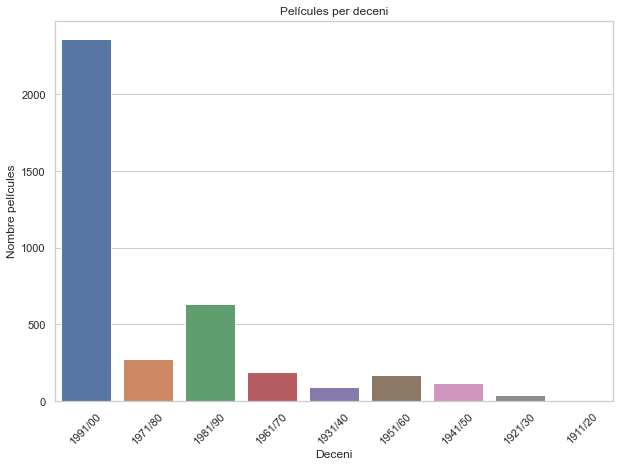

In [666]:
plt.figure(figsize =(10, 7))
plt.xticks(rotation=45) # rotem labels per encabir-los
plt.title('Películes per deceni')
myCountPlot=sns.countplot(x='Deceni', data=moviesDf)
myCountPlot.set( xlabel = "Deceni", ylabel = "Nombre películes")

* Violin plot

[Text(0.5, 0, 'Deceni'), Text(0, 0.5, 'Nombre películes')]

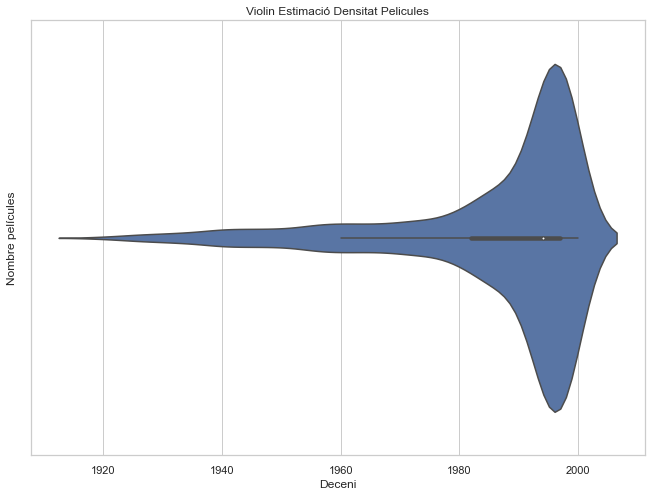

In [671]:
plt.figure(figsize =(11, 8))
plt.title('Violin Estimació Densitat Pelicules')
sns.set_style("whitegrid")
myViolinPlot=sns.violinplot(data=moviesDf, x="Any")
myViolinPlot.set( xlabel = "Deceni", ylabel = "Nombre películes")

#### Una variable Categórica (Genere) i una numerica ( any)

In [639]:
moviesDf.columns

Index(['Iden', 'Titol', 'Any', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Deceni'],
      dtype='object')

In [640]:
anyCategSumDf = pd.DataFrame()
for i in range (3,18):
    col2Df=moviesDf.iloc[:,lambda moviesDf:[21,i]].groupby(['Deceni']).sum().copy()
    anyCategSumDf =pd.concat([anyCategSumDf,col2Df],axis=1)
    del col2Df

In [641]:
anyCategSumDf 

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi
Deceni,,,,,,,,,,,,,,,
1911/20,1,1,0,0,3,0,0,2,0,0,0,0,0,0,0
1921/30,1,1,0,0,12,2,1,17,0,0,1,2,2,2,1
1931/40,3,7,5,7,28,3,0,27,0,1,9,12,3,19,2
1941/50,2,5,9,12,19,9,0,43,0,19,12,13,11,10,3
1951/60,10,14,4,11,25,7,1,66,4,7,26,17,5,18,30
1961/70,19,15,6,19,44,7,1,68,2,2,21,18,5,10,13
1971/80,44,32,7,24,70,16,2,96,4,1,44,11,6,12,33
1981/90,124,78,16,34,209,27,11,220,26,5,118,10,13,60,69
1991/00,299,130,58,144,790,140,111,1064,32,9,112,31,61,340,125


In [642]:
colnames=anyCategSumDf.columns

In [643]:
#Dibuixarem el número de pel·licules per cada gènere a la base de dades (hi ha pel·lícules amb més d'un gènere)
dataSumDf = anyCategSumDf.apply(np.sum).sort_values()
dataSumDf


Film-Noir        44
Fantasy          68
Animation       105
Mystery         106
Musical         114
Documentary     127
Crime           211
Children's      251
Sci-Fi          276
Adventure       283
Horror          343
Romance         471
Action          503
Comedy         1200
Drama          1603
dtype: int64

In [644]:
dataSumDf.index

Index(['Film-Noir', 'Fantasy', 'Animation', 'Mystery', 'Musical',
       'Documentary', 'Crime', 'Children's', 'Sci-Fi', 'Adventure', 'Horror',
       'Romance', 'Action', 'Comedy', 'Drama'],
      dtype='object')

[Text(0.5, 0, 'Generes'), Text(0, 0.5, 'Nombre películes')]

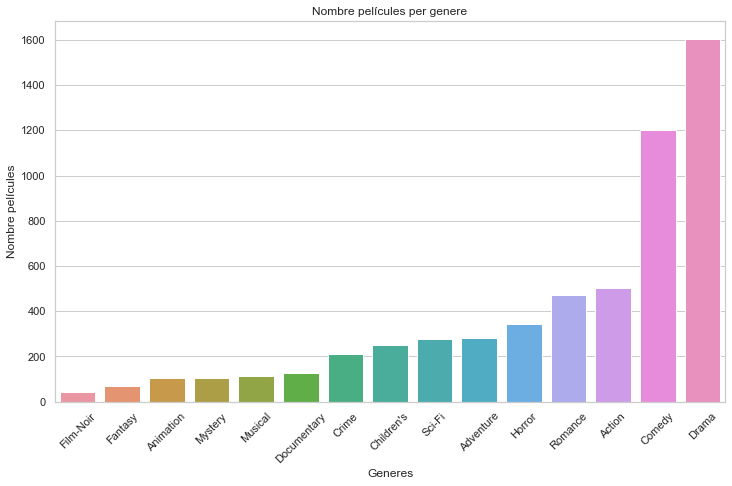

In [674]:
plt.figure(figsize =(12, 7))
sns.set_style("whitegrid")
plt.xticks(rotation=45) # rotem labels per encabir-los
plt.title('Nombre películes per genere')
myBarPlot=sns.barplot(x=dataSumDf.index, y=dataSumDf.values,)
myBarPlot.set( xlabel = "Generes", ylabel = "Nombre películes")


#### Multiples variables categóriques

[Text(0.5, 0, 'Decenis'), Text(0, 0.5, 'Nombre pelíclules')]

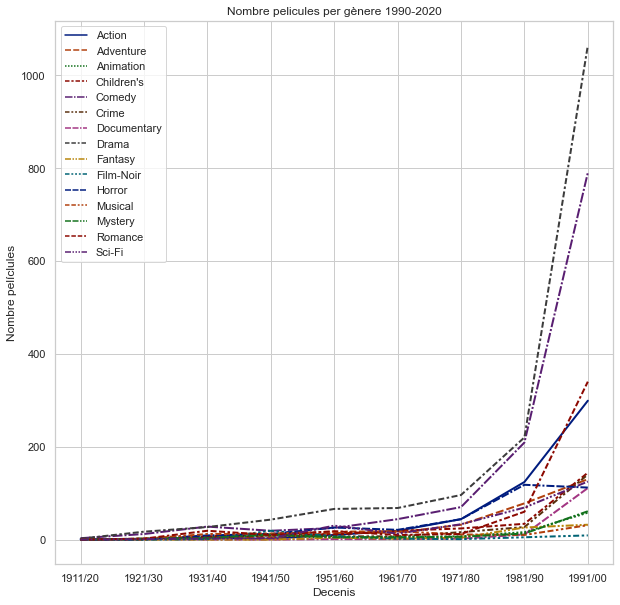

In [646]:
#sns.lineplot(data=col1Df,markers=colnames, legend=False, linewidth=2,ms=15, mec='r',mew=2,mfc='g')
#sns.show()
#sns.lineplot( x=col1Df.index,y=colnames[2], ,palette='dark',data=col1Df,color='y')
plt.figure(figsize =(10, 10))
plt.title('Evolució nombre pelicules per gènere 1900-2020')
myLinePlot=sns.lineplot(data=anyCategSumDf,palette='dark',linewidth=2)
myLinePlot.set( xlabel = "Decenis", ylabel = "Nombre pelíclules")


In [647]:
#agrupem per any
filmsAnyDf = anyCategSumDf.groupby("Deceni")[anyCategSumDf.columns].sum()
filmsAnyDf.tail(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi
Deceni,,,,,,,,,,,,,,,
1971/80,44,32,7,24,70,16,2,96,4,1,44,11,6,12,33
1981/90,124,78,16,34,209,27,11,220,26,5,118,10,13,60,69
1991/00,299,130,58,144,790,140,111,1064,32,9,112,31,61,340,125


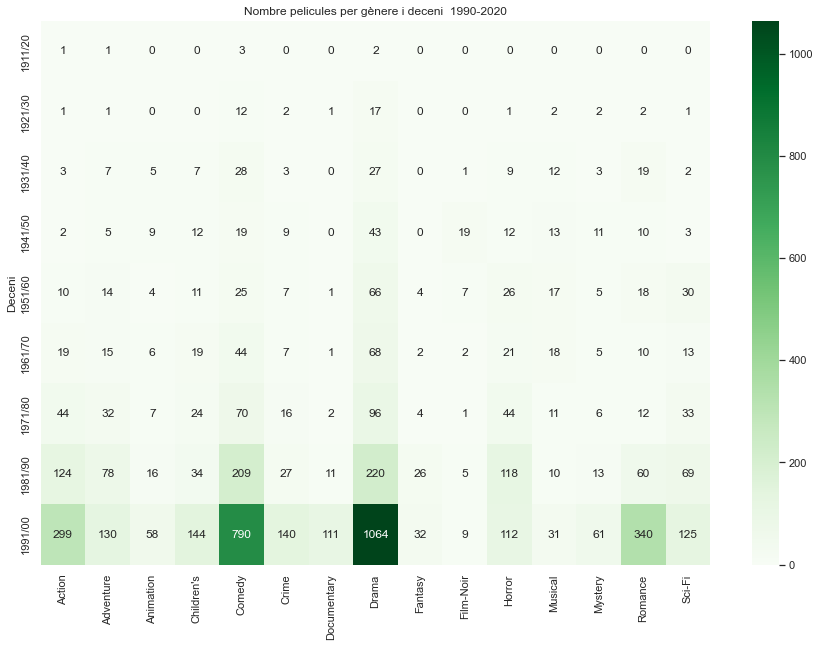

In [675]:
plt.figure(figsize =(15, 10))
plt.title('Nombre pelicules per gènere i deceni  1990-2020')
sns.heatmap(filmsAnyDf,annot=True,cmap='Greens',fmt='d');